<a href="https://colab.research.google.com/github/ritterl/MasterLAB/blob/master/Chapter10ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook, chapter 10 of [Machine Learning](https://www.amazon.de/Machine-Learning-techniques-predictive-modeling-ebook/dp/B07PYXX3H5) with R is summarized and the code samples are described. This section of the book serves to show how machine learning algorithms can be evaluated. More precisely, it gives reasons why also other measures than predictive accuracy are needed to assess performance. Further, approaches to ensure that the performance measures reasonably reflect a model's ability to predict or forecast unseen cases are provided. 

#Measuring performance for classification 

By simply dividing the number of correct predictions by the total number of predictions, a wrong picture about the performance of the classifier may occur. This especially arises in datasets with a large class imbalance and is also referred to as **class imbalance problem**. For instance, if a positive event occurs very often (in say 99% of the cases), a model which predicts always a positive case has an accuracy of 99%. However, it is not useful for predicting the negative cases. 

# Understanding a classifier's predictions

Besides the two important data types: **actual class values** and **predicted class values** which are obvious, however, the majority of models can deliver another important type of information: the **estimated probability of the prediction** or in other words the confidence of the model about a particular decision. So, when comparing two models with the same number of mistakes, it is possible to say that the one which makes better assessments regarding its uncertainty is smarter.

First of all, the predicted probabilities from the SMS model developed in chapter 4 of the book are drawn. Therefore, it is important to note that the code of chapter 4 needs to be executed prior to this section. In this example, the `predict() `function gives the probability for each possible outcome. Each line of the following output sums up to 1 due to the fact that these are mutually exclusive and exhaustive events. In other words: An SMS can only either be "ham" or "spam", but not both at the same time and it cannot be something else or something in between. 

In [3]:
#does not work (SMS classifier modified into a csv file)
sms_classifier <- read.csv("https://github.com/ritterl/MasterLAB/blob/master/sms_classifier.csv?raw=true")
#sms_test <- read.csv("https://github.com/ritterl/MasterLAB/blob/master/sms_test.csv?raw=true")
install.packages("tm")
library(tm)


Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“line 3 appears to contain embedded nulls”
Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“line 4 appears to contain embedded nulls”
Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“line 5 appears to contain embedded nulls”
Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”
Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“embedded nul(s) found in input”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: NLP



In [4]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘pROC’


Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate




In [5]:
#does not work, because download of classifier was not possible (see above)
# obtain the predicted probabilities
sms_test_prob <- predict(sms_classifier, sms_test, type = "raw")
head(sms_test_prob)

ERROR: ignored

In [0]:
## Confusion matrices in R ----
sms_results <- read.csv("https://raw.githubusercontent.com/ritterl/MasterLAB/master/sms_results.csv")

In this step a first glimpse into the sms_results is made. It shows the actual type as well as the predicted type on the LHS, and on the RHS the probability (estimated by the model) of the object being either spam or ham. As it can be observed, the model was extremely certain about its decisions. 

In [7]:
# the first several test cases
head(sms_results)

,actual_type,predict_type,prob_spam,prob_ham
,<fct>,<fct>,<dbl>,<dbl>
1,ham,ham,0.00000,1.00000
2,ham,ham,0.00000,1.00000
3,ham,ham,0.00016,0.99984
4,ham,ham,0.00004,0.99996
5,spam,spam,1.00000,0.00000
6,ham,ham,0.00020,0.99980


In the previous cases, the model was very confident, but of course, there are also other cases in which the model was unconfident about its decision.

In [8]:
head(subset(sms_results, prob_spam > 0.40 & prob_spam < 0.60))

,actual_type,predict_type,prob_spam,prob_ham
,<fct>,<fct>,<dbl>,<dbl>
377,spam,ham,0.47536,0.52464
717,ham,spam,0.56188,0.43812
1311,ham,spam,0.57917,0.42083


In [9]:
head(subset(sms_results, actual_type != predict_type))

,actual_type,predict_type,prob_spam,prob_ham
,<fct>,<fct>,<dbl>,<dbl>
53,spam,ham,0.00071,0.99929
59,spam,ham,0.00156,0.99844
73,spam,ham,0.01708,0.98292
76,spam,ham,0.00851,0.99149
184,spam,ham,0.01243,0.98757
332,spam,ham,0.00003,0.99997


Especially in these cases the question can be posed, whether the model is useful or not. 

# A closer look at confusion matrices

A **confusion** matrix has two dimensions. One dimension displays the actual values (rows) and the other dimension displays the predicted values (columns). In the diagonal cells the model predicted the actual value correct and in the off-diagonal cells the predictions were incorrect. In R, a confusion matrix can be created with the `table()` function.




In [10]:
table(sms_results$actual_type, sms_results$predict_type)

      
        ham spam
  ham  1203    4
  spam   31  152

With the introduction of confusion matrices, also a new terminology needs to be implemented, whereas first of all the class of interest needs to be defined. In the ham/spam example, "spam" is referred to as the **positive class**, since the spam-filter is interested in finding spam messages. Consequently, the **negative class** are the ham messages. It should be obvious that positive and negative are not related with "good and bad", but solely needed to distinguish between the different classes. 
However, now it is possible to implement this terminology in the confusion matrix. 
- predicted spam / actual spam = True positive (TP -> 152)
- predicted ham / acutal ham = True negative (TN -> 1203)
- predicted spam / actual ham = False positive (FP -> 4)
- predicted ham / actual spam = False negative (FN -> 31)




Confusion matrices are a helpful tool to measure performance. For instance, the accuracy can easily be calculated as following: accuracy = (TP + TN)/(TP + TN + FP + FN). Also the error rate is very simple to calculate: error rate = (FP + FN)/(TP + TN + FP + FN) = 1 - accuracy.

Besides the previous confusion matrix which contains no additional information, it is also possible to create a matrix with more informative value using the `CrossTable()` function. 



In [11]:
# using the CrossTable function
install.packages("gmodels")
library(gmodels)
CrossTable(sms_results$actual_type, sms_results$predict_type)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gdata’





 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1390 

 
                        | sms_results$predict_type 
sms_results$actual_type |       ham |      spam | Row Total | 
------------------------|-----------|-----------|-----------|
                    ham |      1203 |         4 |      1207 | 
                        |    16.128 |   127.580 |           | 
                        |     0.997 |     0.003 |     0.868 | 
                        |     0.975 |     0.026 |           | 
                        |     0.865 |     0.003 |           | 
------------------------|-----------|-----------|-----------|
                   spam |        31 |       152 |       183 | 
                        |   106.377 |   841.470 |           | 
                        |     0.169 |     0.831 |     0.132 | 

In [12]:
# accuracy and error rate calculation --
# accuracy
(152 + 1203) / (152 + 1203 + 4 + 31)


[1] 0.9748201

In [13]:
# error rate
(4 + 31) / (152 + 1203 + 4 + 31)
# error rate = 1 - accuracy
1 - 0.9748201

[1] 0.02517986

[1] 0.0251799

# Beyond accuracy - other measures of performances

In the following section alternative performance measures will be shown. For this purpose, the `caret` package developed by Max Kuhn is required. The syntax is close to the `table()` function, but with a slight distinction. It is required to define the positive class (as described above), since `caret` evaluates performance based on the ability to classify the positive (spam) class. 

# The kappa statistic

In [14]:
install.packages("e1071")
library(e1071)
confusionMatrix(sms_results$predict_type, sms_results$actual_type, positive = "spam")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Confusion Matrix and Statistics

          Reference
Prediction  ham spam
      ham  1203   31
      spam    4  152
                                          
               Accuracy : 0.9748          
                 95% CI : (0.9652, 0.9824)
    No Information Rate : 0.8683          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8825          
                                          
 Mcnemar's Test P-Value : 1.109e-05       
                                          
            Sensitivity : 0.8306          
            Specificity : 0.9967          
         Pos Pred Value : 0.9744          
         Neg Pred Value : 0.9749          
             Prevalence : 0.1317          
         Detection Rate : 0.1094          
   Detection Prevalence : 0.1122          
      Balanced Accuracy : 0.9136          
                                          
       'Positive' Class : spam            
                        

Especially the **Kappa statistic** (range from 0 to 1) is interesting in this output, since it adjusts the accuracy of a model by taking into account correct predictions by chance. When taking the introductory example with the class imbalance problem and a model which always predicts "positive", the Kappa statistic would reveal the weakness of this model. Hence, only classifiers which are more often correct than "correct predictions by chance" are rewarded by Kappa. The formula for kappa is the following: 
(Pr(a) - Pr(e))/(1-Pr(e)), where Pr(a) represents the proportion of actual agreement and Pr(e) represents the expected agreement (between the classifier and the true values).

In order to compute the observed agreement simply the proportion of the TP's and TN's must be summed up, which is again the already known measure "accuracy". The data can be taken from the `CrossTable()` above. 

In [15]:
# example using SMS classifier
pr_a <- 0.865 + 0.109
pr_a

[1] 0.974

The calculation for Pr(e) is a bit more complicated. First of all, it is noteworthy that the following calculation holds only under the assumption that the events are **independent** from each other. Following this assumption, it is possible to apply a probability rule which says that the probability of both occuring, is nothing else than the product of the probabilities.
- Pr(actual_type is ham)*Pr(predicted_type is ham)
-Pr(actual_type is spam)*Pr(predicted_type is spam). Again, these probabilites can be found in the `CrossTable()`.
Finally, Pr(e) is the sum of the probabilities that the predicted and actual values agree. This is possible because the two events are mutually exlcusive (a SMS can either be ham or spam but there is no intersection).

In [16]:
pr_e <- 0.868 * 0.888 + 0.132 * 0.112
pr_e

[1] 0.785568

Applying the pre-defined formular for Kappa leads to: 

In [17]:
k <- (pr_a - pr_e) / (1 - pr_e)
k


[1] 0.8787494

which is in line with the result generated by the `confusionMatrix()` before. However, there are also other possibilities to obtain R which will not be explained in detail at this point.

In [18]:
# calculate kappa via the vcd package
install.packages("vcd")
library(vcd)
Kappa(table(sms_results$actual_type, sms_results$predict_type))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘lmtest’


Loading required package: grid



            value     ASE     z Pr(>|z|)
Unweighted 0.8825 0.01949 45.27        0
Weighted   0.8825 0.01949 45.27        0

In [19]:
# calculate kappa via the irr package
install.packages("irr")
library(irr)
kappa2(sms_results[1:2])

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘lpSolve’


Loading required package: lpSolve



 Cohen's Kappa for 2 Raters (Weights: unweighted)

 Subjects = 1390 
   Raters = 2 
    Kappa = 0.883 

        z = 33 
  p-value = 0 

# Sensitivity and specificity

In the next section, two very important measures will be introduced: sensitivity and specificity. They are important to find a balanced model which is neither too conservative nor too aggressive. When taking the SMS example: On the one hand, this means that the model should not classify almost every single SMS (specificity) as spam and on the other hand, it should not allow too many spam SMS getting through the filter (sensitivity). It is apparent that these two goals can be considered a tradeoff. Therefore, it is important to decide, which measure is more relevant. With the SMS example, it can be said that it is worse if a ham SMS is deleted because it is considered as spam, than if a spam SMS is not deleted and it ends up in the inbox. 

The sensitivity is also referred to as true positive rate and is calculated as following: sensitivity = TP / (TP + FN). Using the numbers of the confusion matrix:

In [20]:
sens <- 152 / (152 + 31)
sens

[1] 0.8306011

In contrast, the specificity is also referred to as true negative rate and is calculated as following: specificity = TN / (TN + FP). Using the numbers of the confusion matrix:

In [21]:
spec <- 1203 / (1203 + 4)
spec

[1] 0.996686

It is also possible to calculate the measures directly with the aid of the `caret` package. 

In [22]:
# example using the caret package

sensitivity(sms_results$predict_type, sms_results$actual_type, positive = "spam")
specificity(sms_results$predict_type, sms_results$actual_type, negative = "ham")

[1] 0.8306011

[1] 0.996686

# Precision and recall

In the following section two new measures will be introduced: precision and recall. When looking at their formulaes, the similarity with specificity and sensitivity become quickly apparent. However, there are slight differences. **Precision** can be regarded as a measure that displays how often the model is correct when predicting the **positive** class. Therefore, a precise model predicts the positive class only, if it is very confident about its decision. When applying the SMS filter, a high precision would mean that the model is only filtering and deleting messages that are actually spam. The formula is the following: precision = TP / (TP + FP)

In [23]:
#Using the numbers from the confusion matrix
prec <- 152 / (152 + 4)
prec

[1] 0.974359

This number says that if the model predicts spam, it is in almost 97.5% of the cases correct. 
The other measure evaluates the completeness of the results. The formula is the same as for sensitivity: recall = TP / (TP + FN), but the interpretation is different. If the SMS model has a high recall, a large fraction of the spam messages are correctly determined. Again, recall can easily be computed by using the confusion matrix:

In [24]:
rec <- 152 / (152 + 31)
rec

[1] 0.8306011

Also by using the `caret ` package, precision and recall can be calculated.

In [25]:
# example using the caret package
posPredValue(sms_results$predict_type, sms_results$actual_type, positive = "spam")
sensitivity(sms_results$predict_type, sms_results$actual_type, positive = "spam")

[1] 0.974359

[1] 0.8306011

# The F-measure

A further interesting figure is the so-called **F-measure**. The F-measure has the nice feature that one single number subsumizes the previously introduced concepts precision and recall and therefore, allows a convenient comparison of models. In the F-measure, precision and recall are combined in a particular way of average which is utilized for rates of change and called **harmonic mean**: The formula is the following: F-measure = (2x prec * rec) / (rec + prec).

In [26]:
# F-measure
f <- (2 * prec * rec) / (prec + rec)
f

# Alternative calculation by using numbers from confusion matrix
f <- (2 * 152) / (2 * 152 + 4 + 31)
f

[1] 0.8967552

[1] 0.8967552

# Visualizing performance tradeoffs with ROC curves

So far, only "numbers" have been introduced, but it is also possible to visualize performance by aid of **ROC curves** (receiver operating characteristic curve) for instance. Different models have different strenghts and weaknesses and even if they have the same accuracy it is possible that their decisions and their confidence varies greatly. Typically, the y-axis of the ROC curve represents the TP-rate (sensitivity) and the x-axis represents the FP-rate (= 1 - specificity). Hence, by using ROC curves it is possible to get a deeper understanding of tradeoffs between models with distinct characteristics. To create a ROC curve, the `pRoc` package is needed. 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following object is masked from ‘package:gmodels’:

    ci


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = ham, case = spam

Setting direction: controls < cases



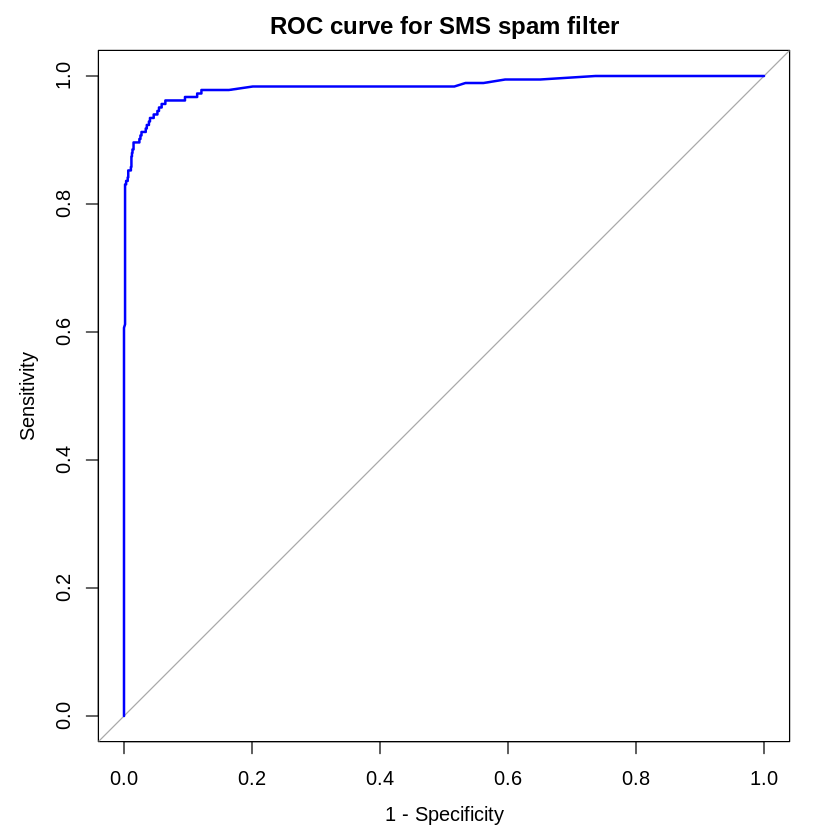

In [27]:
## Visualizing Performance Tradeoffs ----
install.packages("pROC")
library(pROC)
sms_roc <- roc(sms_results$actual_type, sms_results$prob_spam)
# ROC curve for Naive Bayes
plot(sms_roc, main = "ROC curve for SMS spam filter", col = "blue", lwd = 2, legacy.axes = TRUE)

In this plot a ROC curve for the SMS example is shown. The diagonal grey line represents a model that only predicts by "chance" and therefore, has no predictive value, since it predicts TP's and FP's at the same rate. On the contrary, a model with perfect predictive value would go through the 100% TP-rate. The blue line depicts the SMS spam filter model, which obviously has a very high predictive value. Simply put, the larger the area between the blue line and the grey line, the better the classifier. It is possible to calculate the area under the ROC curve **(AUC)**, whereas 0.5 represents a model with no predictive power and 1 a model with perfect predictive power. As the AUC can be the same for differently shaped curves, it is important not to use solely the AUC, but also other measures.  

It is also feasible to compare different models, for instance the k-NN model developed in chapter 3 with the Naive Bayes SMS classifier. 

In [28]:
install.packages("caret")
install.packages("e1071")
library(caret)
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [29]:
# compare to kNN 
sms_results_knn <- read.csv("https://raw.githubusercontent.com/ritterl/MasterLAB/master/sms_results_knn.csv") 
sms_roc_knn <- roc(sms_results$actual_type, sms_results_knn$p_spam)





Setting levels: control = ham, case = spam

Setting direction: controls < cases



In [0]:
#does not work, if "add = FALSE" it works, but obviously without adding the plot above
plot(sms_roc_knn, col = "red", lwd = 2, add = TRUE)

In [30]:
# calculate AUC for Naive Bayes and kNN
auc(sms_roc)
auc(sms_roc_knn)

Area under the curve: 0.9836

Area under the curve: 0.8942

As the area under the red line is obviously smaller, the k-NN approach is less powerful than the Naive Bayes model. This is also confirmed by the AUC.
However, it is not proven if the Naive Bayes model is still better if it is applied to another dataset. Hence, it is important to be able to estimate future performance, which will be the topic of the next section.

# Estimating future performance

In order to reveal very poor machine learners, a number of packages in R already show performance measures during the model-building process, which gives insight about the **resubstitution error**. It occurs if the model cannot predict the data correctly, which were used to build and train the model. Nevertheless, it is not possible to say whether a model with a low resubstitution error performs well when applying it to new data. To circumvent this problem, the whole dataset was separated randomly into a training and a test dataset **(holdout method)**, whereas the model is built upon the training dataset and evaluated with the test dataset.
In an improved version of the holdout method, the dataset is split into a training, a validation and a test dataset in order to overcome biased results, which stem from cherry-picking the best model based on repeated testing. The introduction of a validation dataset can be seen as an intermediate step which helps to improve the model without implementing biased results. In the following code chunk, the different datasets are randomly generated with the `runif() `function. By using `the order()` function, a vector can be created that displays the rank order of the 1000 numbers. Example: `order(c(0.2, 0.4, 0.3))` would result in: `1 3 2`. Because the smallest number (0.2) appears on the first place, the second smallest number (0.3) appears on the third place and the largest number (0.4) appears on the second place.
In the next step, the random ID's are separated into the pre-defined datasets (50% training, 25% validate and 25% test).

In [0]:
# partitioning data
credit <- read.csv("https://raw.githubusercontent.com/ritterl/MasterLAB/master/credit.csv")
# Holdout method
# using random IDs
random_ids <- order(runif(1000))
credit_train <- credit[random_ids[1:500],]
credit_validate <- credit[random_ids[501:750], ]
credit_test <- credit[random_ids[751:1000], ]

This is a nice approach, but it incurs a disadvantage. If there is a large class imbalance in the dataset, it could occur that the randomly defined training dataset cannot learn a particular class. An method to reduce this possibility is the so-called **stratified random sampling** where the subsets consist of the same proportions of classes as the original dataset. With the `createDataPartition()` function from the `caret` package, this can be achieved. 
**Maybe write more here**


But in cases with small datasets, it does not make sense to split it up further. 
In this situations, the `caret` package provides alternative paths to estimate future performance.

# Cross-validation

In this section, the concept behind cross-validation will be introduced. When using the k-fold cross validation, the original dataset is split up into usually 10 random partitions (folds) wheras each fold represents 10% of the data. Thus, the model is based on 90% of the data and finally evaluated with 10% of the data. So, each single fold serves once as the test dataset and 9 times it is used in the training dataset. After repeating this process 10 times, the average performance over all 10 folds will be taken. With the `createFolds()` function from the `caret` package, the folds will randomly be created under consideration of the class balance of the original dataset. 

In [35]:
# 10-fold CV
folds <- createFolds(credit$default, k = 10)
str(folds)

List of 10
 $ Fold01: int [1:100] 2 4 23 41 43 45 57 59 65 68 ...
 $ Fold02: int [1:100] 7 14 53 58 69 75 90 103 113 114 ...
 $ Fold03: int [1:100] 3 25 26 30 32 48 49 64 74 77 ...
 $ Fold04: int [1:100] 13 33 35 36 37 50 87 99 100 108 ...
 $ Fold05: int [1:100] 18 24 31 34 61 62 66 71 91 95 ...
 $ Fold06: int [1:100] 27 40 76 78 81 86 89 98 112 129 ...
 $ Fold07: int [1:100] 10 12 19 51 63 72 82 84 139 142 ...
 $ Fold08: int [1:100] 8 15 29 38 39 46 47 55 92 101 ...
 $ Fold09: int [1:100] 6 9 11 16 17 28 44 60 67 70 ...
 $ Fold10: int [1:100] 1 5 20 21 22 42 52 54 56 85 ...


So, in the first fold 100 random numbers between 1 and 1000 are contained. Each of these numbers represents a row of the original dataset. However, a further step is needed in order to create the model. The chosen 10% are assigned to the test dataset and the remainder (90%) is assigned to the training dataset using the negative symbol.

In [0]:
credit01_test <- credit[folds$Fold01, ]
credit01_train <- credit[-folds$Fold01, ]

Instead of doing this 10 times, it is possible to automate this step, where different packages are needed: `caret` (for folds), `C50` (for decision tree) and `irr` for kappa. 



In [39]:
## Automating 10-fold CV for a C5.0 Decision Tree using lapply() ----
install.packages("C50")
library(C50)
library(irr)

credit <- read.csv("https://raw.githubusercontent.com/ritterl/MasterLAB/master/credit.csv")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘inum’, ‘partykit’, ‘Cubist’




In [40]:
RNGversion("3.5.2") # use an older random number generator to match the book
set.seed(123)
folds <- createFolds(credit$default, k = 10)

Warning message in RNGkind("Mersenne-Twister", "Inversion", "Rounding"):
“non-uniform 'Rounding' sampler used”


In the next chunk, the `lapply()` function is "feeded" with a customized function that carries out what is needed. 

In [0]:
cv_results <- lapply(folds, function(x) {
  credit_train <- credit[-x, ]
  credit_test <- credit[x, ]
  credit_model <- C5.0(default ~ ., data = credit_train)
  credit_pred <- predict(credit_model, credit_test)
  credit_actual <- credit_test$default
  kappa <- kappa2(data.frame(credit_actual, credit_pred))$value
  return(kappa)
})

The lines above deliver 10 kappa statistics, for each of the folds 1. So, in a final step the average kappa can be calculated. However, in order to do so, the results have to be "unlisted", otherwise an error would occur.

In [0]:
str(cv_results)
mean(unlist(cv_results))

List of 10
 $ Fold01: num 0.343
 $ Fold02: num 0.255
 $ Fold03: num 0.109
 $ Fold04: num 0.107
 $ Fold05: num 0.338
 $ Fold06: num 0.474
 $ Fold07: num 0.245
 $ Fold08: num 0.0365
 $ Fold09: num 0.425
 $ Fold10: num 0.505


[1] 0.283796

# Bootstrap sampling

In the last paragraph of this summary, the concept of bootsrap sampling will be briefly introduced. 
Bootstrapping is a statistical method where random samples are used to estimate properties of a larger set. In machine learning, bootstrapping can be used to create various random test and training datasets to estimate model performance. In contrast to k-fold CV, **sampling with replacement** is possible whereas in CV every single example is used only once. However, the average bootstrap training dataset contains only 63.2% of data, compared to the 90% of the 10-fold CV. So, it is highly likely that the bootstrapping method generates a worse model. Nevertheless, it is possible to account for this drawback by computing the performance as a function on the training data (overly optimistic) and the test data (pessimistic).
One positive side of bootstrapping is that it might work better with very small datasets, compared to k-fold CV. Further, bootstrapping can also be used for other applications than performance measurement. 